# Exploratory Data Analysis (EDA)

Here I will explore relationships between the different features in my data.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# system import to access file on different directory 
import sys
sys.path.append("./util_")
import wrangle_

# set a default them for all my visuals
sns.set_theme(style="whitegrid")

In [2]:
train = pd.read_csv("./data/00_temp_train_data_to_be_removed.csv", index_col=0)
train.head()

,vendor_project,product,vulnerability_name,short_description,required_action,due_date,known_ransomware_campaign_use,notes
837,Zimbra,Collaboration (ZCS),Zimbra Collaboration (ZCS) Arbitrary File Uplo...,Zimbra Collaboration (ZCS) allows an attacker ...,Apply updates per vendor instructions.,2022-11-10,Unknown,https://wiki.zimbra.com/wiki/Security_Center
746,Google,Chromium V8,Google Chromium V8 Out-of-Bounds Write Vulnera...,Google Chromium V8 Engine contains out-of-boun...,Apply updates per vendor instructions.,2022-06-22,Unknown,NaN
1132,SolarWinds,Serv-U,SolarWinds Serv-U Path Traversal Vulnerability,SolarWinds Serv-U contains a path traversal vu...,Apply mitigations per vendor instructions or d...,2024-08-07,Unknown,https://www.solarwinds.com/trust-center/securi...
202,Mozilla,Firefox and Thunderbird,Mozilla Firefox And Thunderbird Use-After-Free...,Mozilla Firefox and Thunderbird contain a race...,Apply updates per vendor instructions.,2022-05-03,Unknown,NaN
547,Rails,Ruby on Rails,Ruby on Rails Directory Traversal Vulnerability,Directory traversal vulnerability in Action Vi...,Apply updates per vendor instructions.,2022-04-15,Unknown,NaN


### Using Train data to find more ways to tidy data


#### Start by looking into vulnerability names

In [3]:
# vulnerability_name value count
train["vulnerability_name"].value_counts()

vulnerability_name
Microsoft Win32k Privilege Escalation Vulnerability                         11
Google Chromium V8 Type Confusion Vulnerability                              7
Microsoft Windows Kernel Privilege Escalation Vulnerability                  7
Adobe Flash Player Use-After-Free Vulnerability                              7
Apple Multiple Products Memory Corruption Vulnerability                      6
                                                                            ..
QNAP NAS File Station Cross-Site Scripting Vulnerability                     1
D-Link and TRENDnet Multiple Devices Remote Code Execution Vulnerability     1
Apple Multiple Products Integer Overflow Vulnerability                       1
SonicWall Email Security Unrestricted Upload of File Vulnerability           1
Google Chromium V8 Heap Buffer Overflow Vulnerability                        1
Name: count, Length: 552, dtype: int64

* I see the vulnerability with the most occurances to be the `Microsoft Win32k Privilege Escalation Vulnerability with count 11`. Let see if we can find more related to this one. 

In [4]:
# vulnerability_name with `Microsoft Win32k` in the name
train.vulnerability_name[train.vulnerability_name.str.contains("Microsoft Win32k")].value_counts()

vulnerability_name
Microsoft Win32k Privilege Escalation Vulnerability    11
Microsoft Win32k Memory Corruption Vulnerability        1
Name: count, dtype: int64

* I see two names with `Microsoft Win32k` in them but one is a `memory curruption vulnerability`. So, let see what that's about

In [5]:
# Hese are apearances of memory curruption in the data
train.vulnerability_name[train.vulnerability_name.str.contains("Memory Corruption")].value_counts()

vulnerability_name
Apple Multiple Products Memory Corruption Vulnerability                         6
Microsoft Internet Explorer Scripting Engine Memory Corruption Vulnerability    4
Microsoft Office Memory Corruption Vulnerability                                3
Apple Multiple Products WebKit Memory Corruption Vulnerability                  3
Microsoft Internet Explorer Memory Corruption Vulnerability                     3
Adobe Flash Player Memory Corruption Vulnerability                              2
Apple iOS Memory Corruption Vulnerability                                       2
Apple Memory Corruption Vulnerability                                           1
Apple iOS, iPadOS, and watchOS Memory Corruption Vulnerability                  1
Google Chromium V8 Memory Corruption Vulnerability                              1
Apple iOS WebKit Memory Corruption Vulnerability                                1
Adobe Acrobat and Reader Universal 3D Memory Corruption Vulnerability          

In [6]:
# Find vetor projects that are responsible for all the memory corruption
train["product"][train.vulnerability_name.str.contains("Memory Corruption")].value_counts()

product
Multiple Products                     9
Internet Explorer                     7
iOS                                   4
Office                                3
Flash Player                          2
iOS and macOS                         1
Win32k                                1
Graphics Component                    1
Excel                                 1
Reader and Acrobat                    1
Internet Explorer Scripting Engine    1
iOS, iPadOS, and watchOS              1
Edge                                  1
Acrobat and Reader                    1
Chromium V8                           1
Edge and Internet Explorer            1
Name: count, dtype: int64

In [7]:
# Find vetor projects that are responsible for all the memory corruption
train.vendor_project[train.vulnerability_name.str.contains("Memory Corruption")].value_counts()

vendor_project
Microsoft    16
Apple        15
Adobe         4
Google        1
Name: count, dtype: int64

* The source of memory corruption is from 4 vendors, but it looks like it's happening on different products of these vendors, so I will go back inthe wrangle file and separate the product from the volunerability and create a additional column for specific vulnerabilities groupd by wording.

**I will do this for all the vulnarabilities I can find. because I suspect there is things that can be grouped together.**

In [8]:
train = pd.read_csv("./data/01_original_clean_no_dummies_train.csv", index_col=0)
train.head(3)

,vendor_project,known_ransomware_campaign_use,vulnerability_type,required_action_new,product_category
837,Zimbra,Unknown,File Upload Vulnerability,Apply Updates,Security
746,Google,Unknown,Out-of-Bounds Write Vulnerability,Apply Updates,Browsers
1132,SolarWinds,Unknown,Path Traversal Vulnerability,Apply Mitigations or Discontinue,Networking


#### **Univariate Stats**

Here I will use friquency tables, and and bar plots to explore my categorical variables with added discriptive statistics to help me find relationships between variables.

VENDOR_PROJECT 

vendor_project
Microsoft               170
Apple                    49
Adobe                    45
Cisco                    42
Google                   30
                       ... 
OSGeo                     1
Justice AV Solutions      1
Quest                     1
Artifex                   1
Hikvision                 1
Name: count, Length: 121, dtype: int64


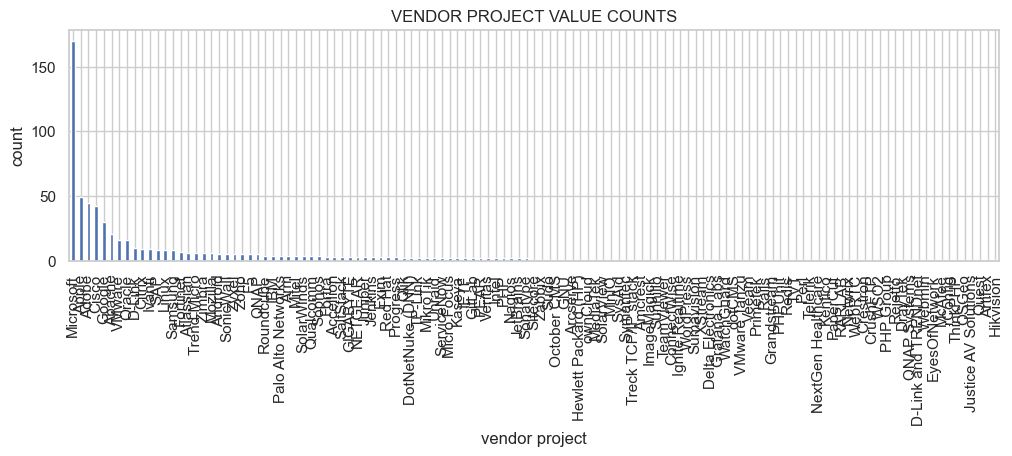



KNOWN_RANSOMWARE_CAMPAIGN_USE 

known_ransomware_campaign_use
Unknown    529
Known      130
Name: count, dtype: int64


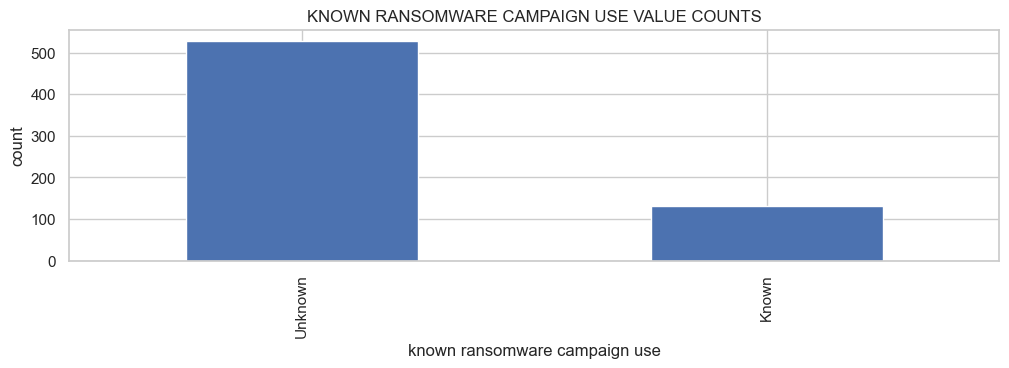



VULNERABILITY_TYPE 

vulnerability_type
Privilege Escalation Vulnerability                    93
Remote Code Execution Vulnerability                   90
Command Injection Vulnerability                       59
Improper Access Control Vulnerability                 46
Sandbox Bypass Vulnerability                          43
Memory Corruption Vulnerability                       39
Buffer Overflow Vulnerability                         39
Use-After-Free Vulnerability                          35
Other Vulnerability                                   34
Path Traversal Vulnerability                          24
Information Disclosure Vulnerability                  23
File Upload Vulnerability                             20
Out-of-Bounds Write Vulnerability                     18
Denial of Service Vulnerability                       18
Deserialization of Untrusted Data Vulnerability       16
Type Confusion Vulnerability                          15
Arbitrary File Upload Vulnerability           

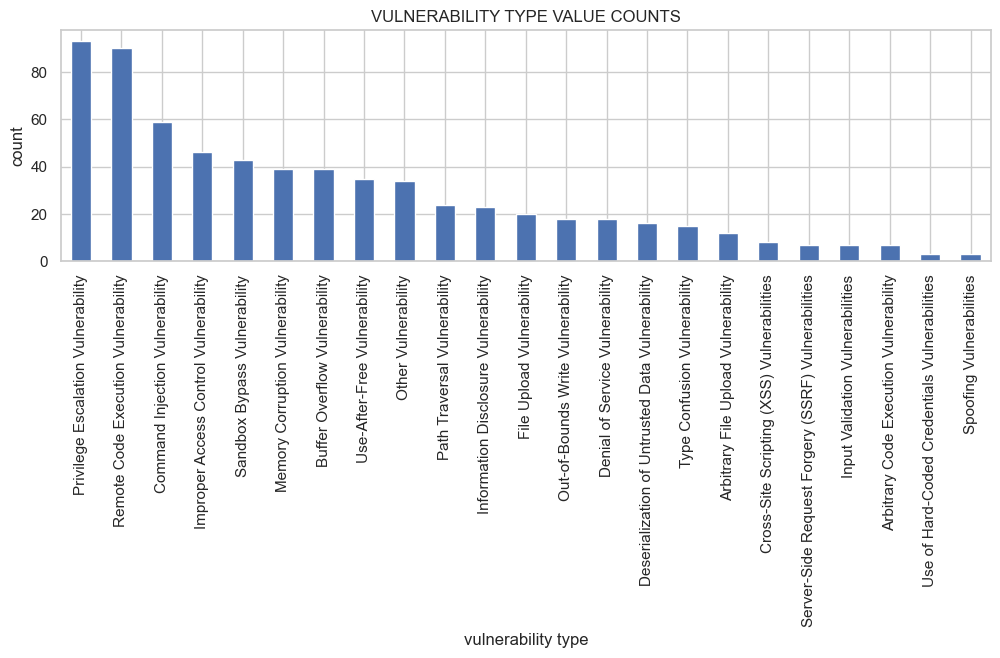



REQUIRED_ACTION_NEW 

required_action_new
Apply Updates                        505
Apply Mitigations or Discontinue      93
End of Life Disconnect                32
Apply Updates or Discontinue          12
Apply Remediations or Discontinue      6
Legacy Disconnect                      3
0                                      3
Mitigate GroupLock or Discontinue      2
Verify Cisco Compliance                1
Log4j Remediation                      1
DLink Update or Disconnect             1
Name: count, dtype: int64


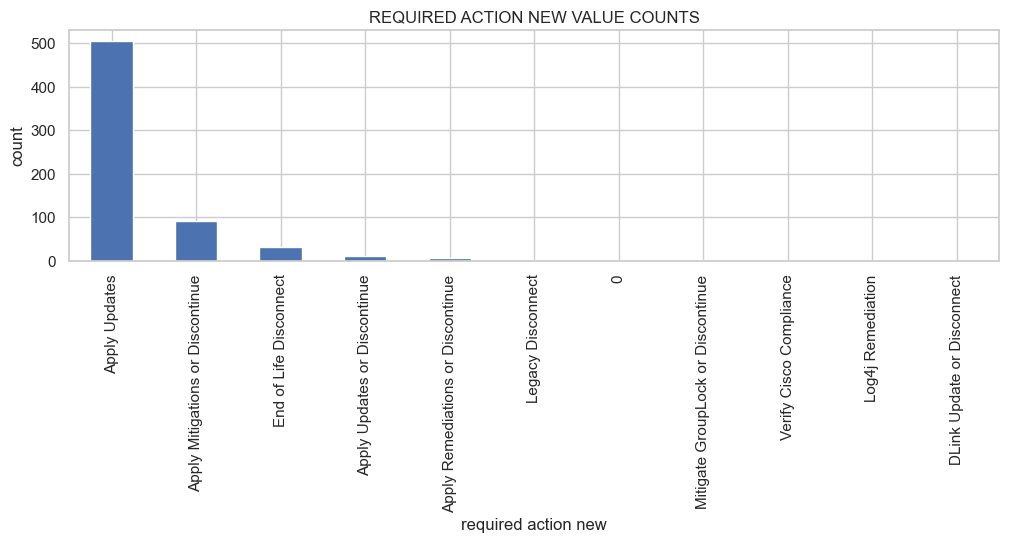



PRODUCT_CATEGORY 

product_category
Operating Systems             117
Networking                     81
Microsoft Products             68
Other                          67
Security                       63
Development and Frameworks     58
Browsers                       56
Adobe Products                 43
Web Servers and Middleware     37
Virtualization and Cloud       17
Hardware                       15
Storage                        15
Cisco Products                 12
Database                       10
Name: count, dtype: int64


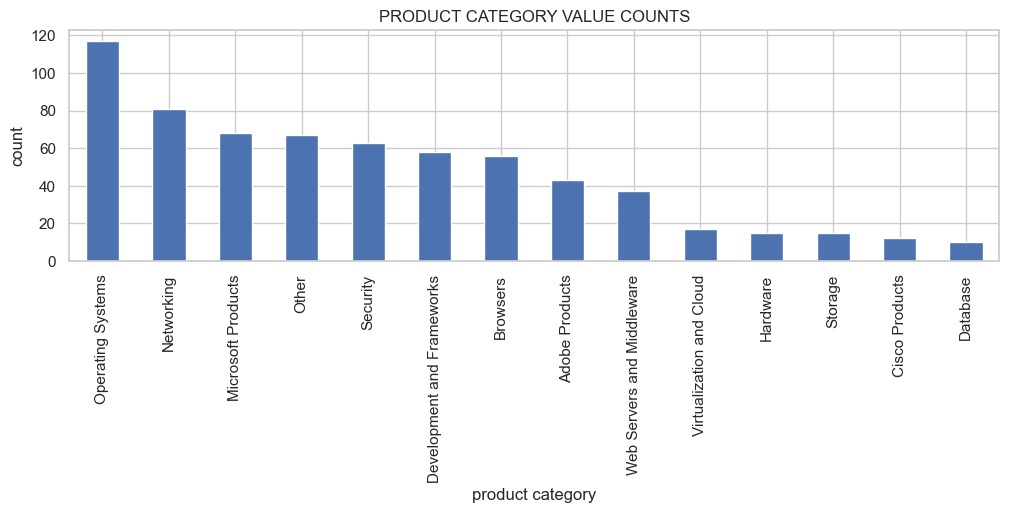

In [15]:
for col in train.columns:
    print(col.upper(), "\n")
    print(train[col].value_counts())
    plt.figure(figsize=(12,3))
    train[col].value_counts().plot.bar()
    plt.title(col.replace("_"," ").upper() + " VALUE COUNTS")
    plt.xlabel(col.replace("_"," "))
    plt.ylabel("count")
    plt.show()
    print("\n")